# I do machine learning practices and projects here

#Housing Price Analysis Mini Project

In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np

# Load the dataset
df = pd.read_csv('Housing.csv')

# Display the first 10 rows of the dataset
df.head(10)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [2]:
# Get a statistical summary of the dataset
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder(categories=[['unfurnished','semi-furnished','furnished']])
df['mainroad'] = label_encoder.fit_transform(df['mainroad'])
df['guestroom'] = label_encoder.fit_transform(df['guestroom'])
df['hotwaterheating'] = label_encoder.fit_transform(df['hotwaterheating'])
df['airconditioning'] = label_encoder.fit_transform(df['airconditioning'])
df['prefarea'] = label_encoder.fit_transform(df['prefarea'])
df['furnishingstatus'] = ordinal_encoder.fit_transform(df[['furnishingstatus']])
df['basement'] = label_encoder.fit_transform(df['basement'])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2.0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2.0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1.0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2.0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2.0


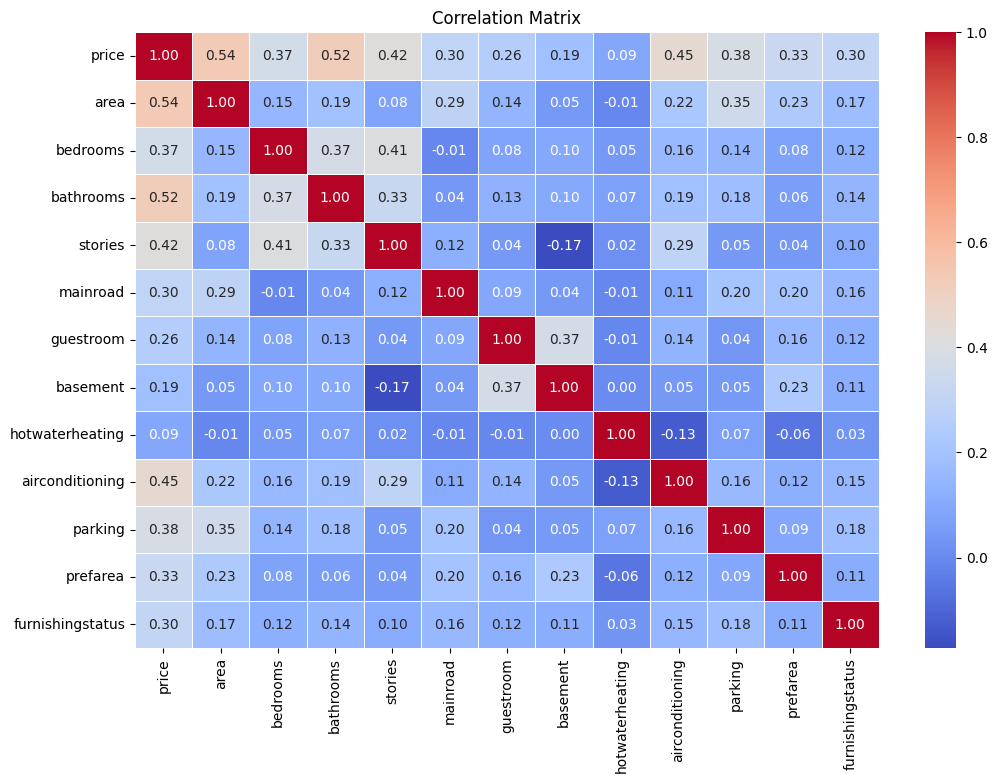

In [5]:
# Display the correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


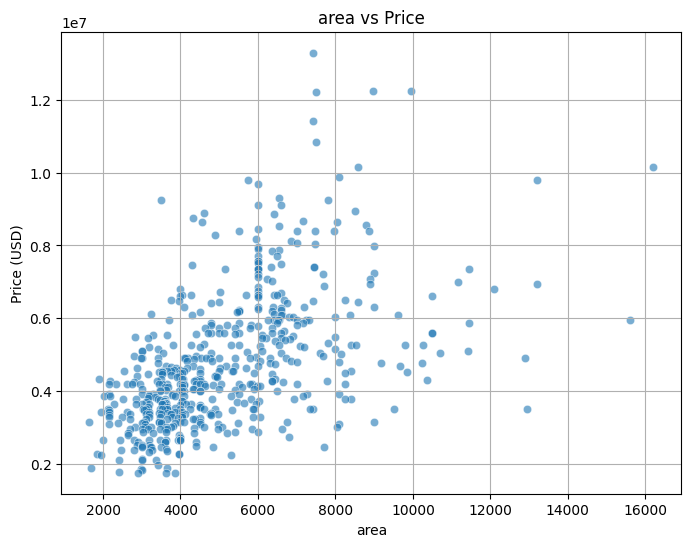

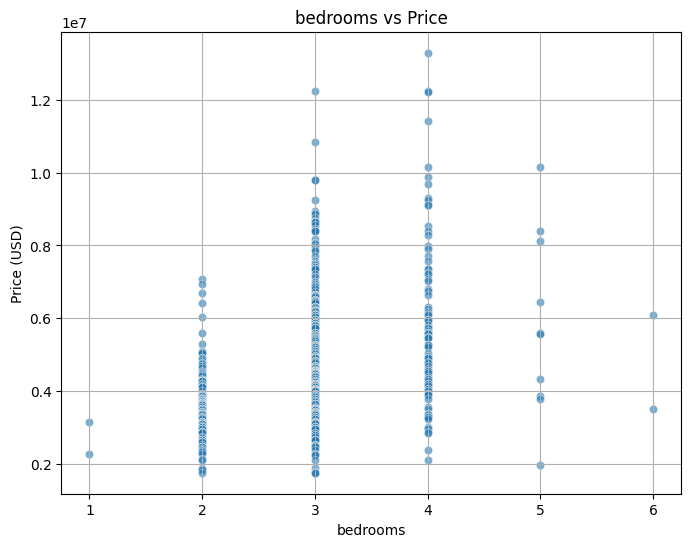

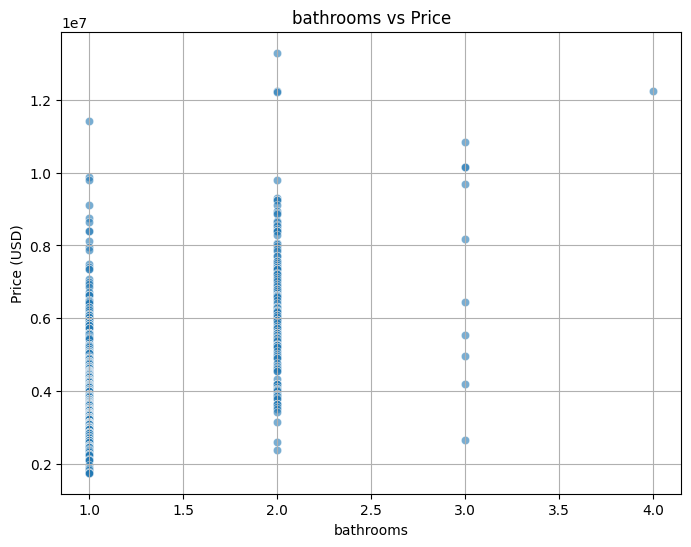

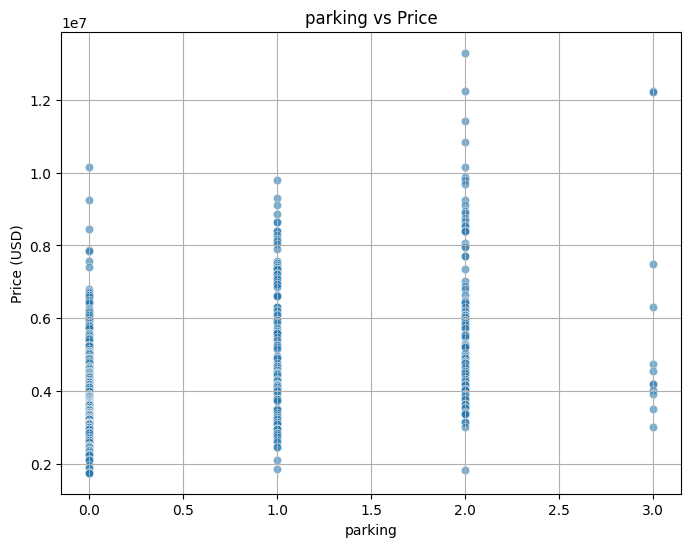

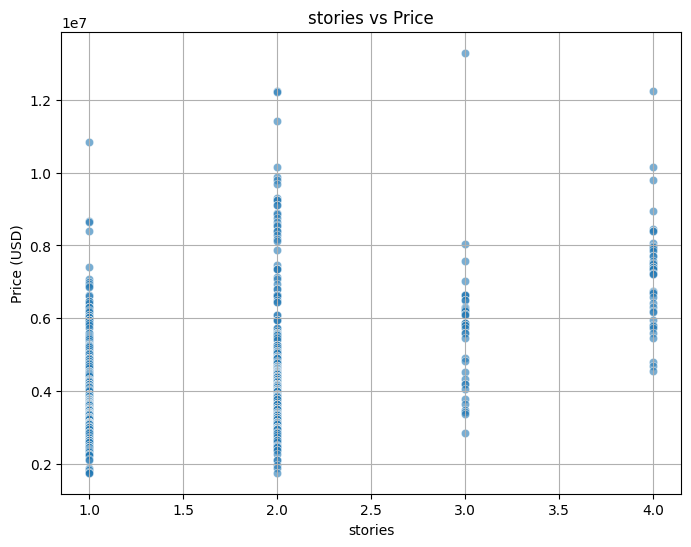

In [6]:
# Visualize relationships between features and price
feature_to_plot = ['area', 'bedrooms', 'bathrooms', 'parking', 'stories']
for feature in feature_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='price', alpha=0.6)
    plt.title(f'{feature} vs Price')
    plt.xlabel(feature)
    plt.ylabel('Price (USD)')
    plt.grid()
    plt.show()


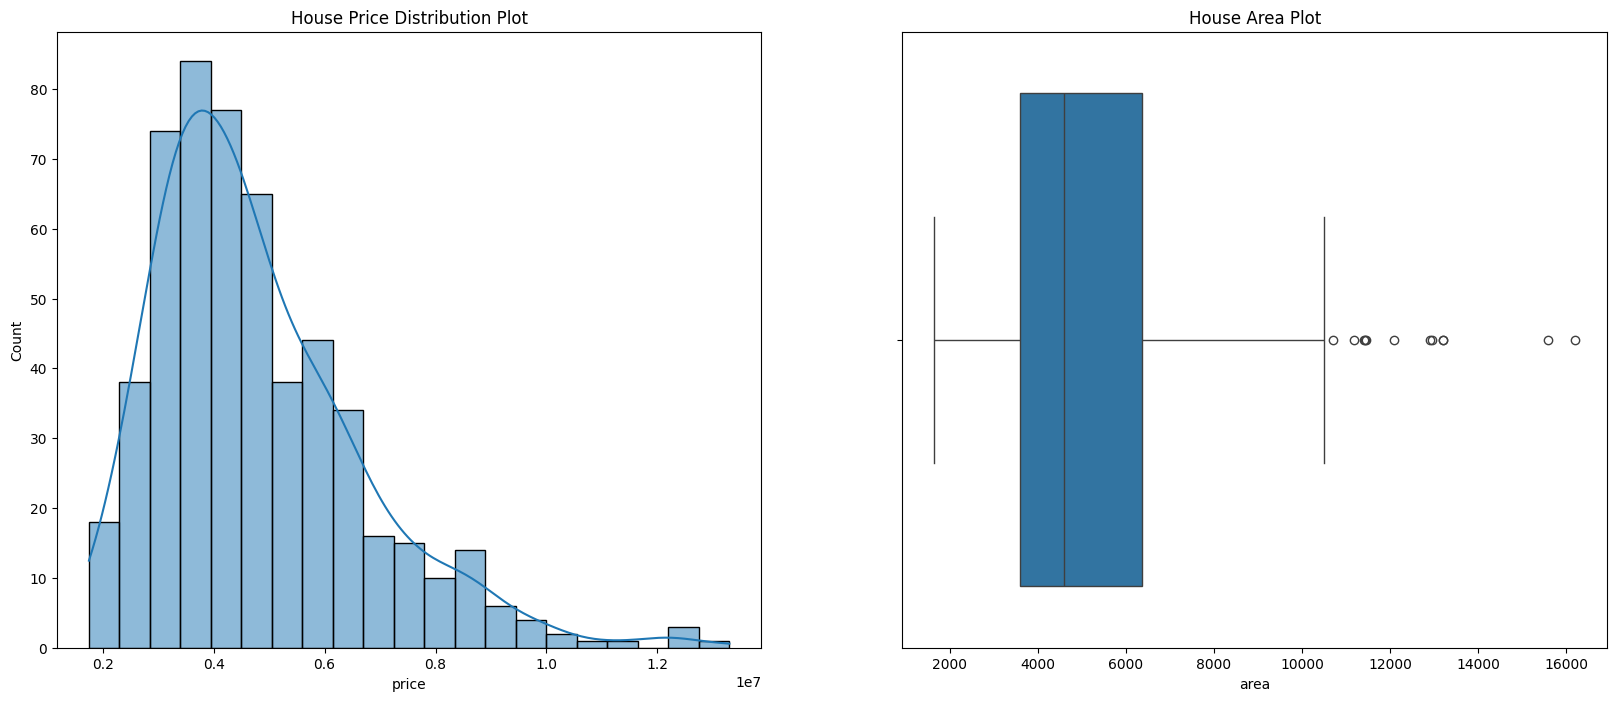

In [7]:
# Visualize house price distribution
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.title('House Price Distribution Plot')
sns.histplot(df['price'], kde=True)

plt.subplot(1, 2, 2)
sns.boxplot(x=df['area'])
plt.title('House Area Plot')
plt.show()


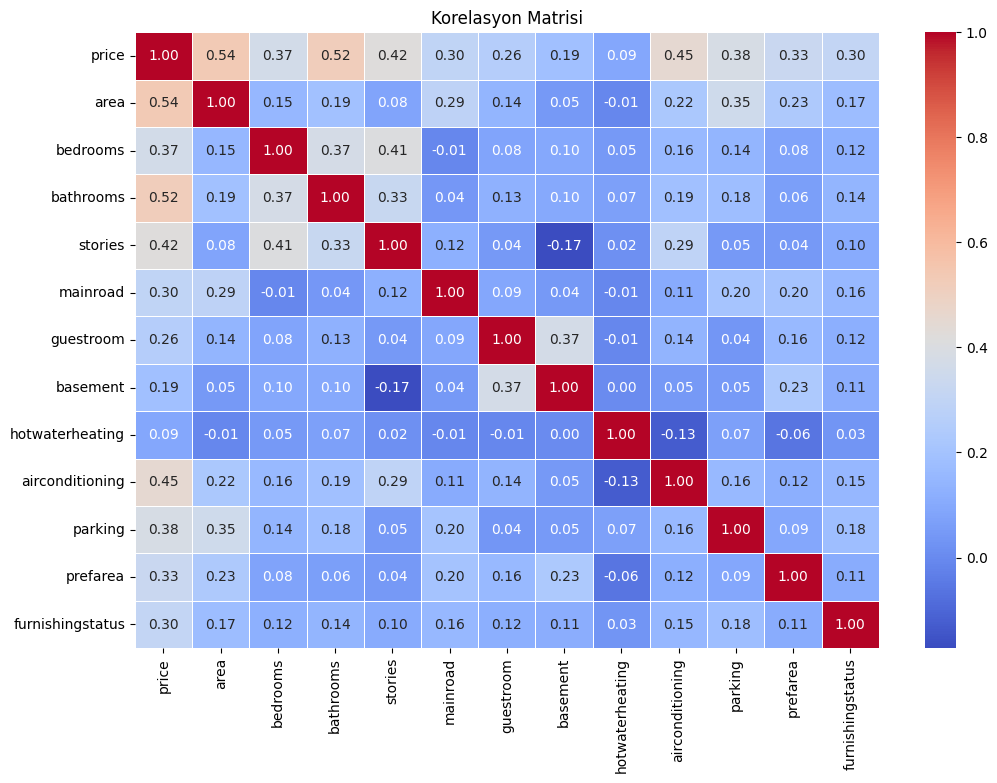

In [8]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.show()

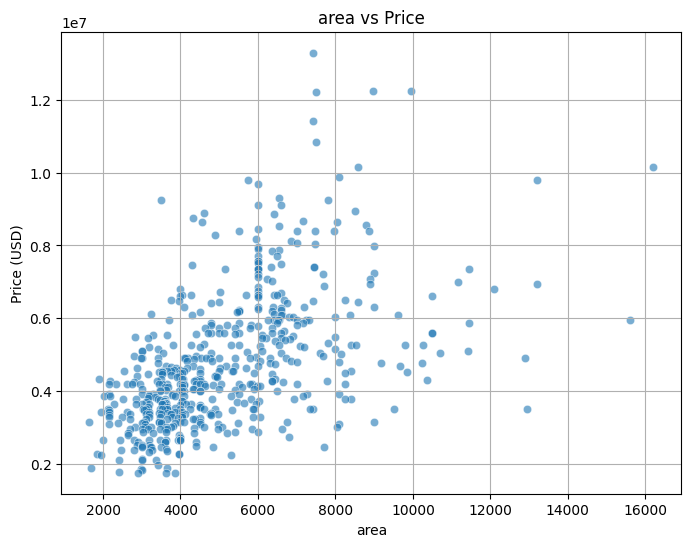

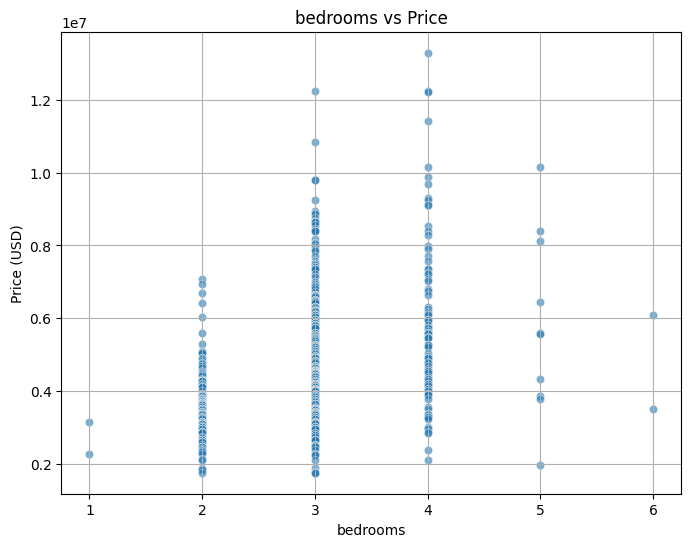

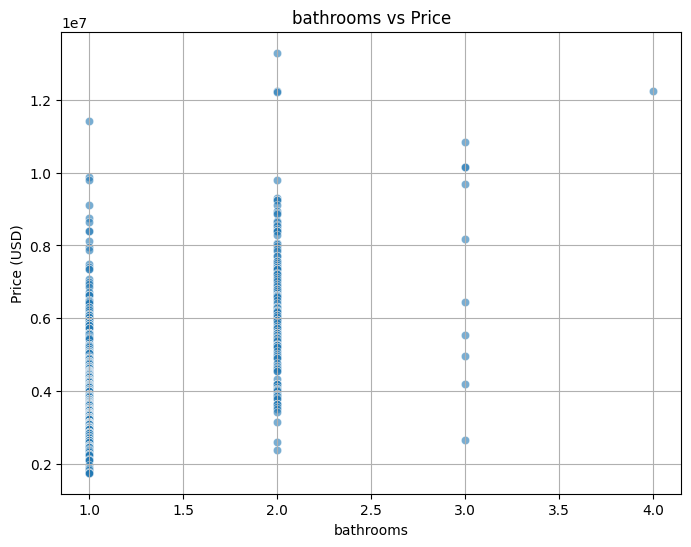

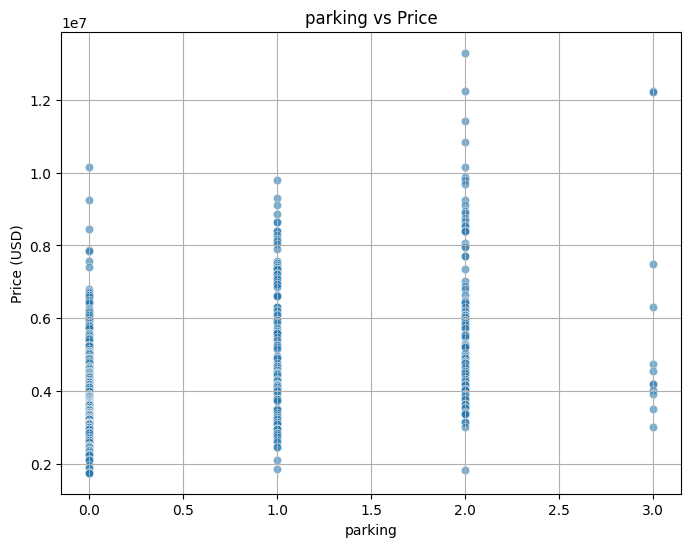

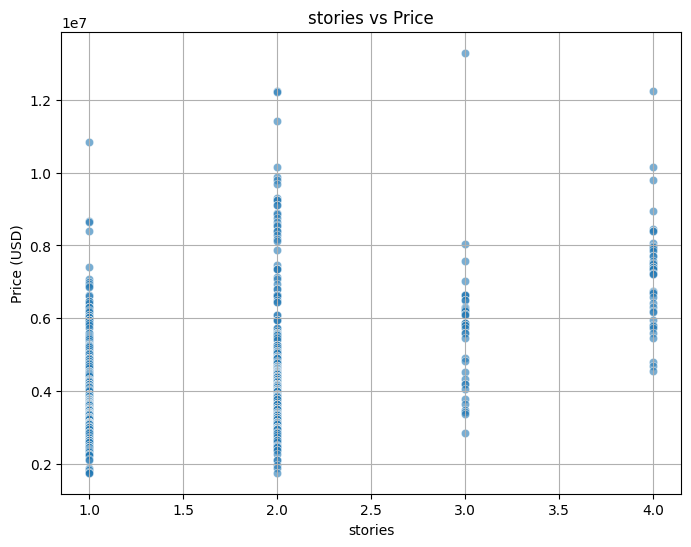

In [9]:
# özellikleri listele, for ile listeyi dolaş, tabloya başla figure oluştur, scatter oluştur, title, xlabel falan oluştur
import matplotlib.pyplot as plt
import seaborn as sns
feature_to_plot = ['area', 'bedrooms', 'bathrooms', 'parking', 'stories']
for feature in feature_to_plot:
  plt.figure(figsize=(8,6))
  sns.scatterplot(data=df, x=feature, y='price', alpha=0.6)
  plt.title(f'{feature} vs Price')
  plt.xlabel(feature)
  plt.ylabel('Price (USD)')
  plt.grid()
  plt.show()

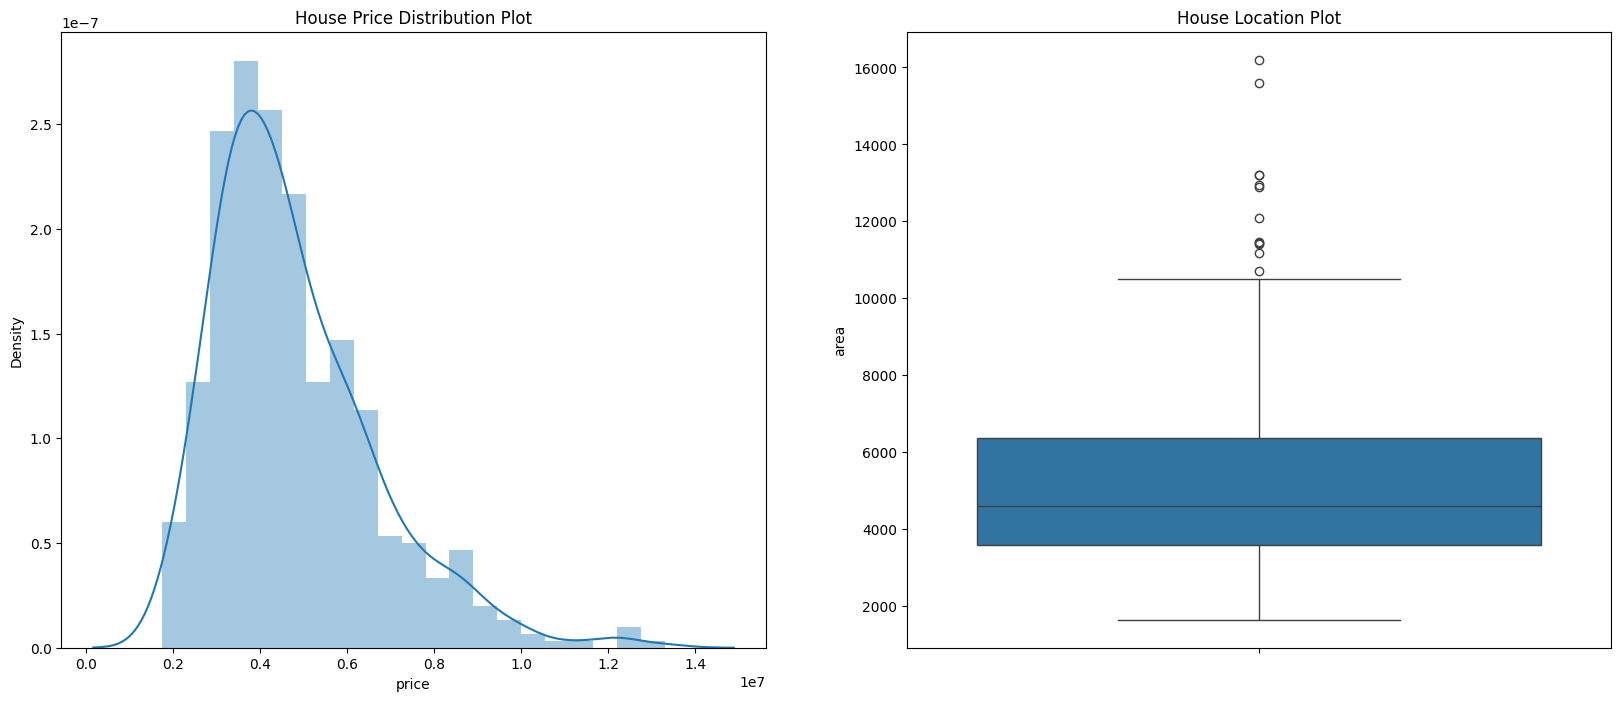

In [10]:
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.title('House Price Distribution Plot')
sns.distplot(df.price)

plt.subplot(1,2,2)
sns.boxplot(df.area)
plt.title('House Location Plot')

plt.show()

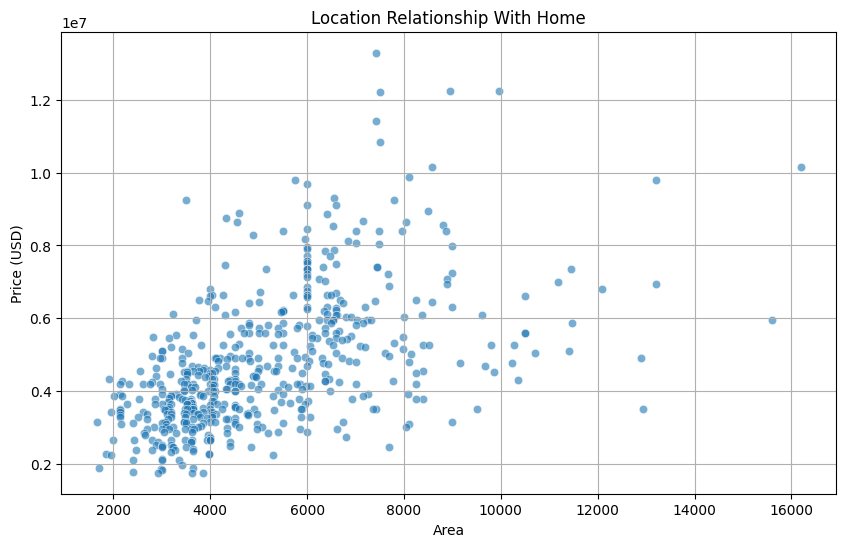

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='area', y='price', alpha=0.6)
plt.title('Location Relationship With Home')
plt.xlabel('Area')
plt.ylabel('Price (USD)')
plt.grid()
plt.show()

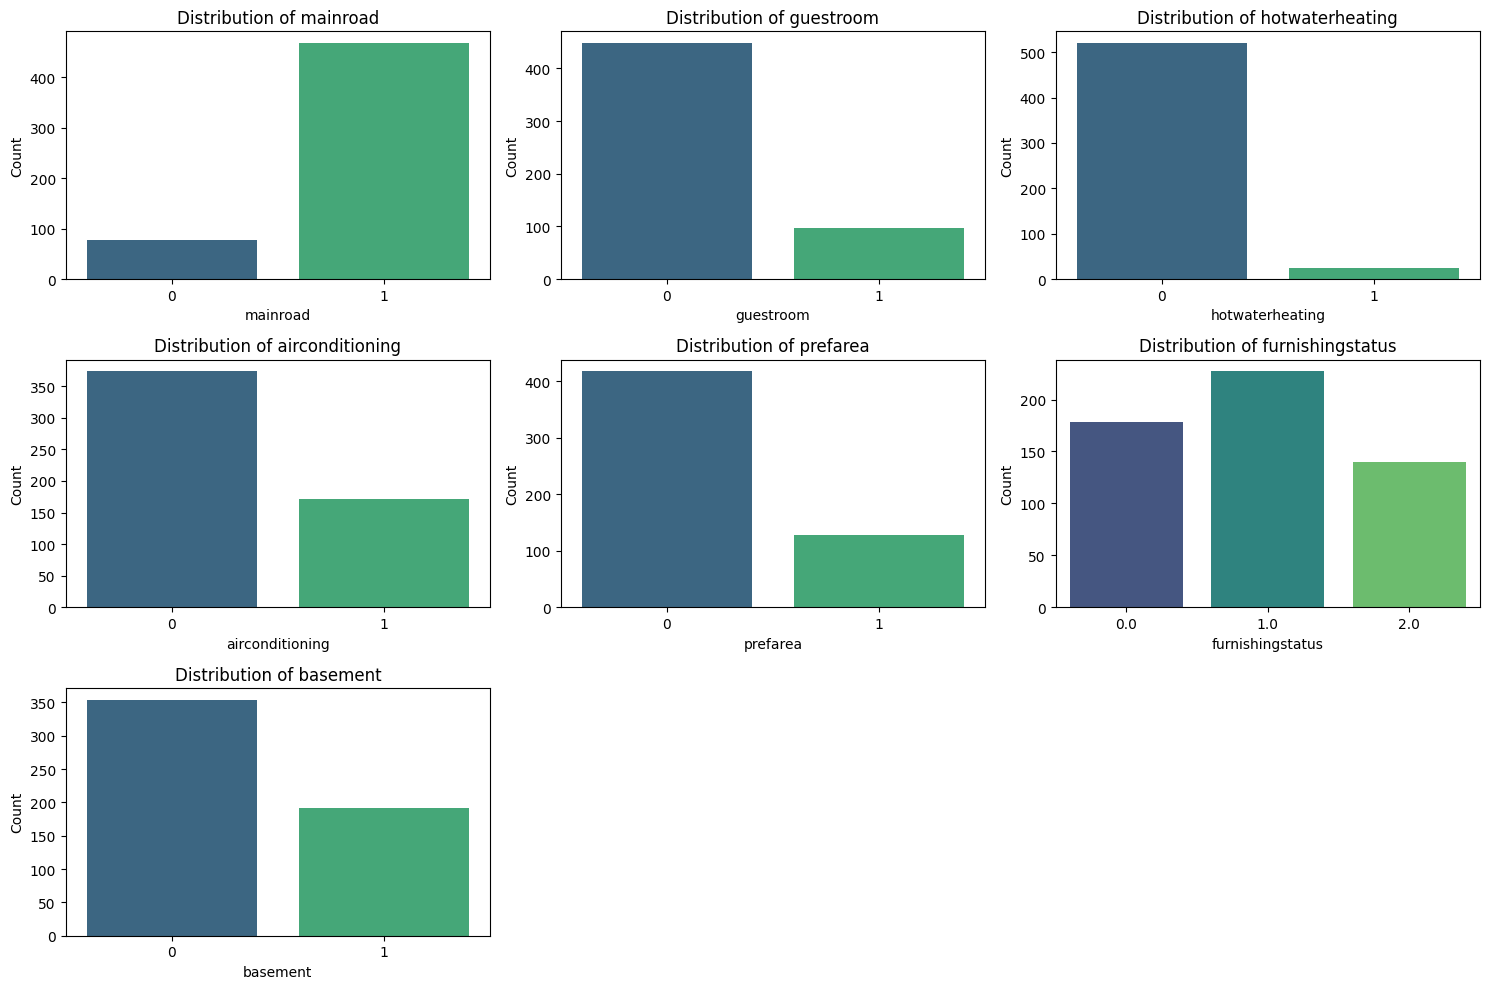

In [12]:
# Bar plot for categorical features
categorical_features = ['mainroad', 'guestroom', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus', 'basement']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()


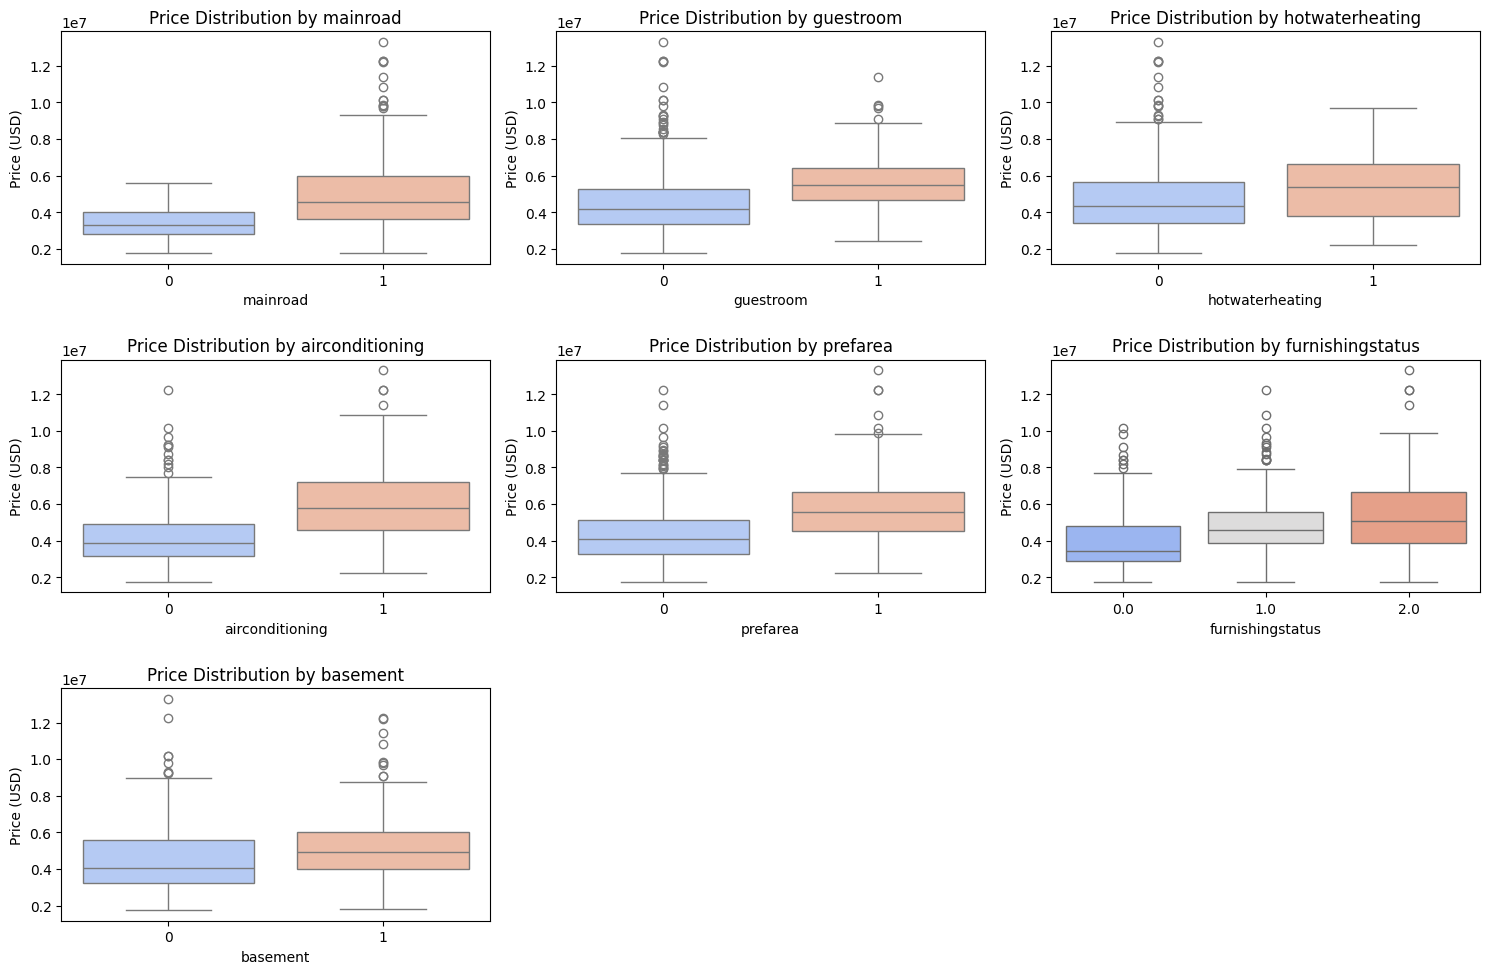

In [13]:
# Box plot for price by categorical features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x=feature, y='price', palette='coolwarm')
    plt.title(f'Price Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Price (USD)')
plt.tight_layout()
plt.show()


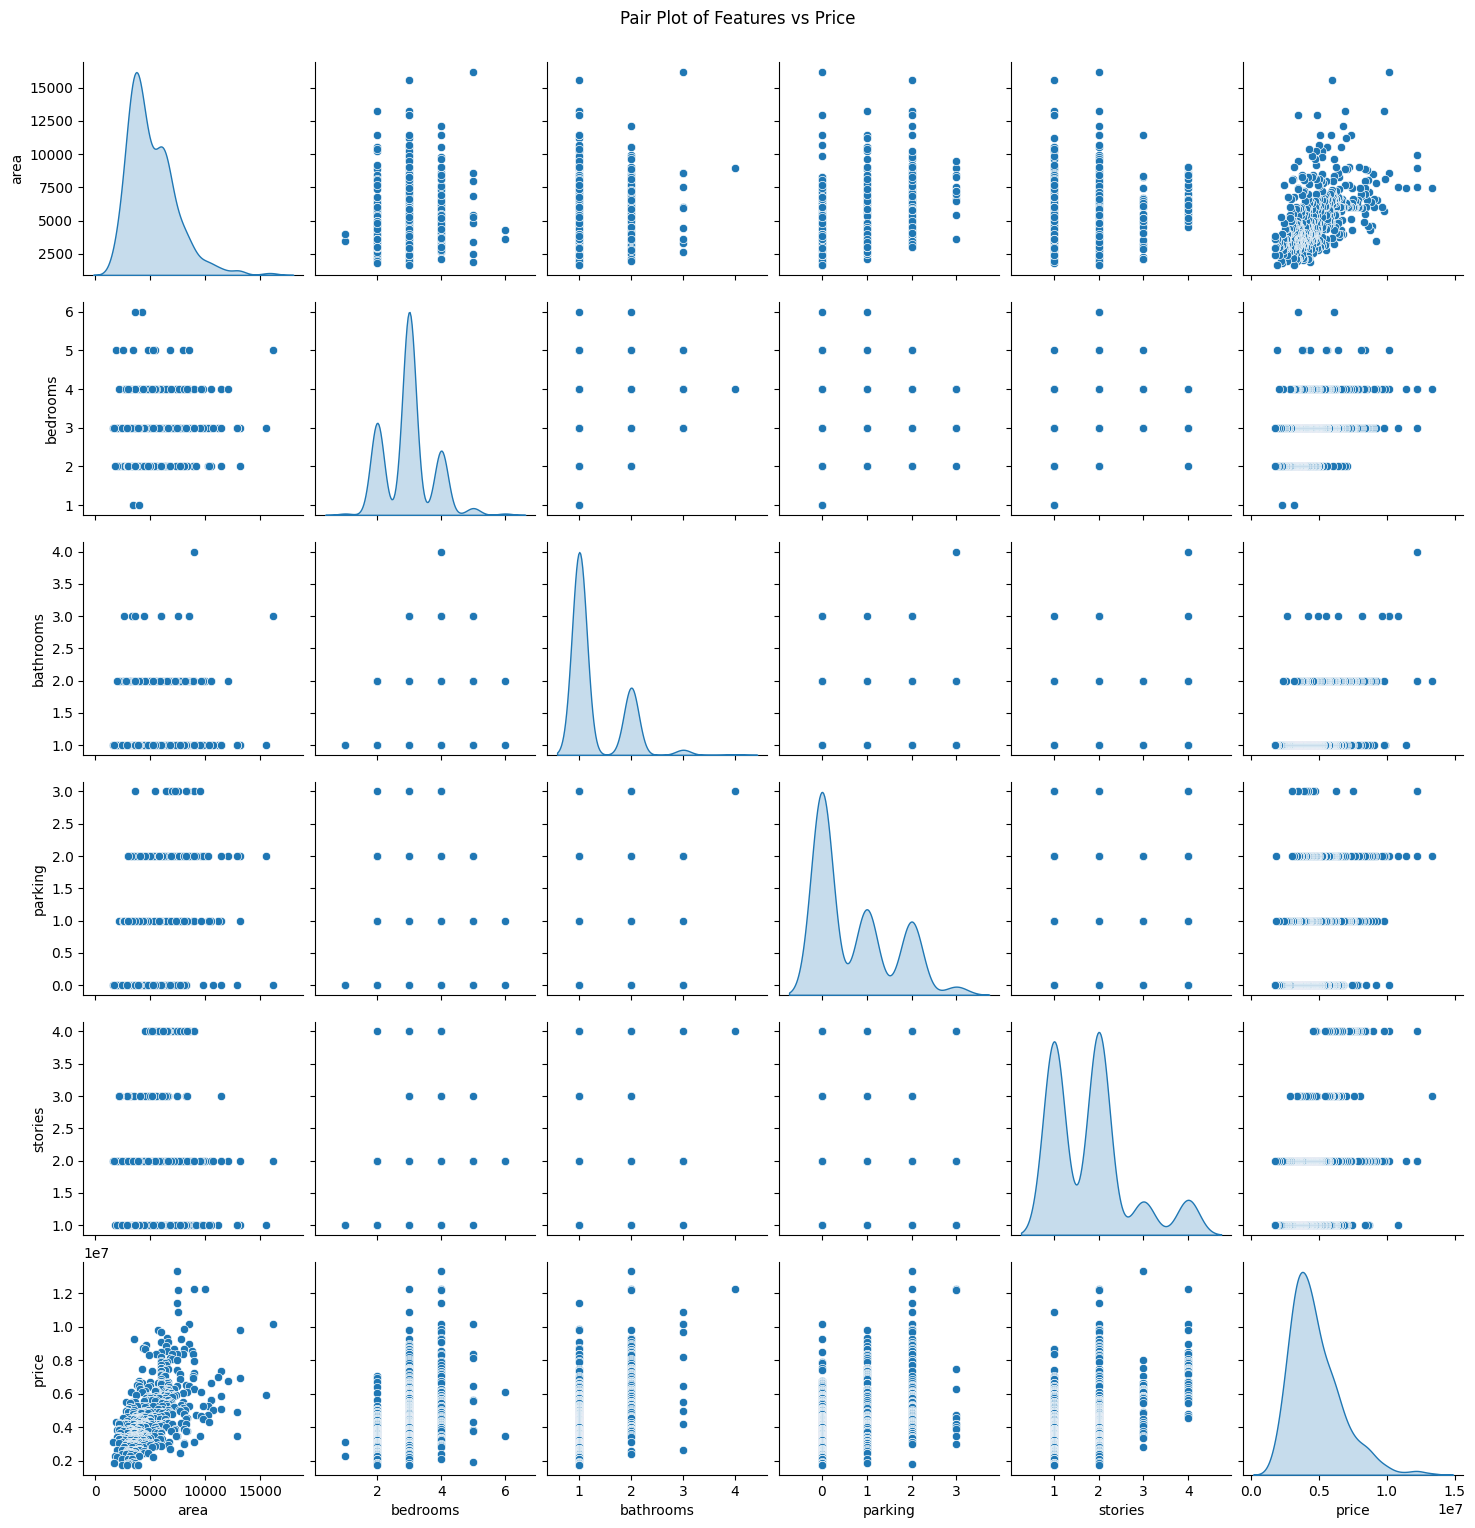

In [14]:
# Pair plot for continuous features
continuous_features = ['area', 'bedrooms', 'bathrooms', 'parking', 'stories']
sns.pairplot(df[continuous_features + ['price']], diag_kind='kde', palette='viridis')
plt.suptitle('Pair Plot of Features vs Price', y=1.02)
plt.show()


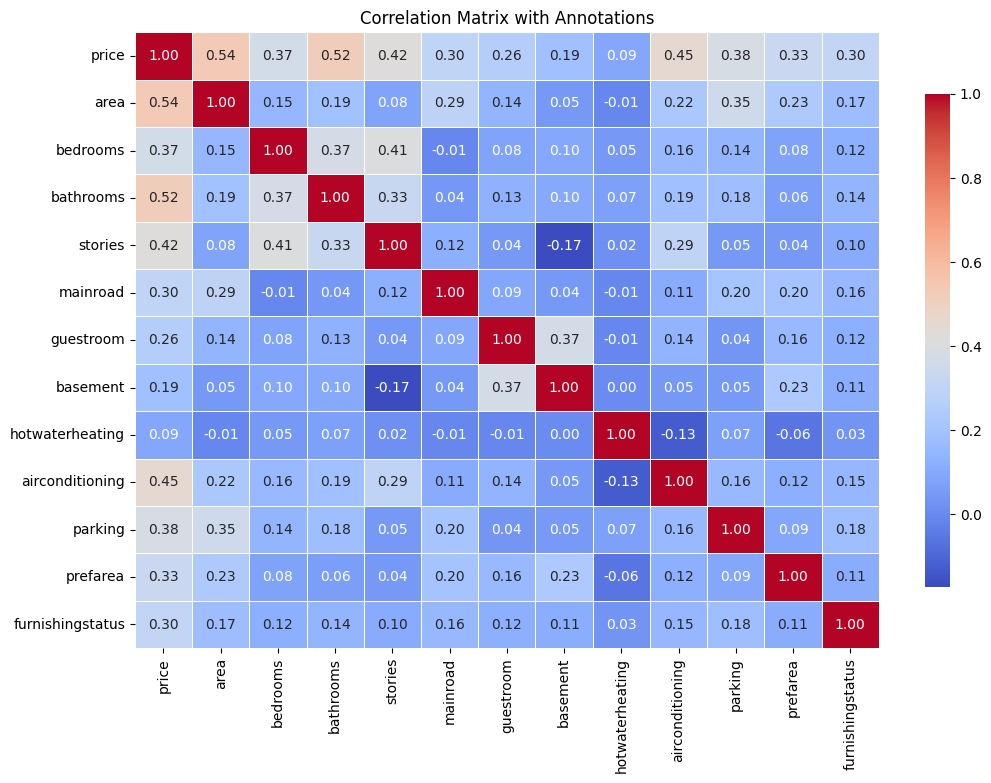

In [15]:
# Enhanced correlation matrix heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix with Annotations')
plt.show()

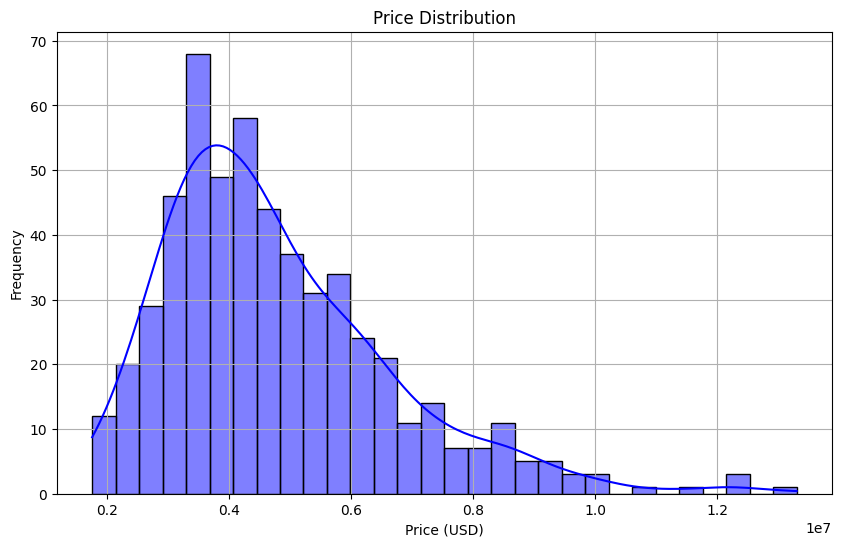

In [16]:
# Histogram for price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.grid()
plt.show()

In [17]:
# Define target and features
y = df['price']
features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'furnishingstatus']
X = df[features]

In [18]:
# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

In [19]:
# Specify and fit the Decision Tree model
iowa_model = DecisionTreeRegressor(random_state=1)
iowa_model.fit(train_X, train_y)

# Make predictions and calculate MAE
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE when not specifying max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE when not specifying max_leaf_nodes: 1,063,008


In [20]:
# Optimize the Decision Tree model with max_leaf_nodes
iowa_model = DecisionTreeRegressor(max_leaf_nodes=100, random_state=1)
iowa_model.fit(train_X, train_y)
val_predictions = iowa_model.predict(val_X)
val_mae = mean_absolute_error(val_predictions, val_y)
print("Validation MAE for best value of max_leaf_nodes: {:,.0f}".format(val_mae))

Validation MAE for best value of max_leaf_nodes: 1,024,210


In [21]:
# Fit the Random Forest model
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(train_X, train_y)

# Make predictions and calculate MAE
rf_model_pred = rf_model.predict(val_X)
rf_val_mae = mean_absolute_error(rf_model_pred, val_y)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 878905.60486618


In [22]:
# Define other models
lr = LinearRegression()
gb = GradientBoostingRegressor()
rf = RandomForestRegressor()
xgb = XGBRegressor()

estimators = [('lr', lr), ('gb', gb), ('rf', rf), ('xgb', xgb)]

# Evaluate models using cross-validation
for estimator in estimators:
    scores = cross_val_score(estimator[1], train_X, train_y, scoring='r2', cv=10)
    print(estimator[0], np.round(np.mean(scores), 2))

lr 0.63
gb 0.55
rf 0.52
xgb 0.44


In [27]:
for LR in range(1, 4):
    for RF in range(1, 4):
        for GB in range(1, 4):
            for XGB in range(1, 4):
                vr = VotingRegressor(estimators, weights=[LR, RF, GB, XGB])
                scores = cross_val_score(vr, train_X, train_y, scoring='r2', cv=10)
                print("For LR={}, RF={}, GB={}, XGB={}".format(LR, RF, GB, XGB), np.round(np.mean(scores), 2))

In [24]:
# Create and fit the Voting Regressor
from sklearn.metrics import r2_score
vr = VotingRegressor(estimators)
vr.fit(train_X, train_y)
y_pred = vr.predict(val_X)
print("R² Score:", r2_score(val_y, y_pred))

R² Score: 0.6430336464506082


<Axes: >

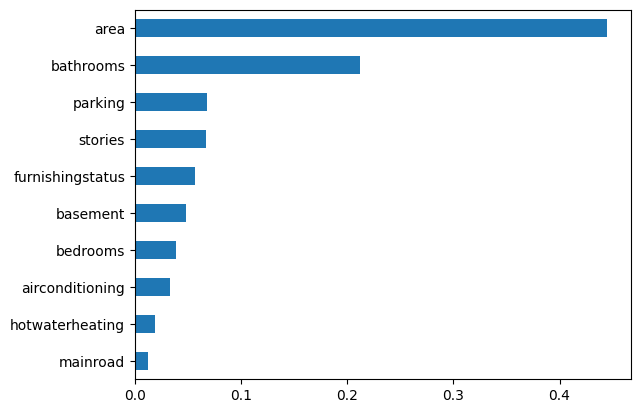

In [25]:
# Hangi özellik model için daha önemli: Feature İmportance Analysing
importances = rf_model.feature_importances_
feature_importances = pd.Series(importances, index=features)
feature_importances.sort_values().plot(kind='barh')

In [26]:
# Hyperparameter tuning for Random Forest model
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
}

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search.fit(train_X, train_y)
best_model = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)


Best parameters: {'max_depth': 10, 'n_estimators': 200}
